# Python Sesión 3 - Método de sobre-relajación sucesiva (SOR)

## Parte 2: Ejemplo

## IIQ2003 - Fenómenos de Transporte - Python S3

Departamento de Ingeniería Química y Bioprocesos

Pontificia Universidad Católica de Chile

Profesor: Felipe Huerta

### Enunciado

En la **Clase 12** se derivó que la ecuación que gobierna el perfil de temperatura para la convección forzada de calor en un tubo circular con un regimen de flujo laminar es:

$$ \rho \hat{c}_p v_{max} \left(1- \left( \frac{r}{R} \right)^2 \right) \frac{\partial T}{\partial z} = k \left[ \frac{1}{r} \frac{\partial}{\partial r}  \left( r \frac{\partial T}{\partial r} \right)  + \frac{\partial^2 T}{\partial z^2} \right] $$

A diferencia de la clase, **no se despreciará** el término de conducción axial $k \frac{\partial^2 T}{\partial z^2}$. Al desarrollar la derivada del lado derecho, restando el lado derecho a ambos lados de la ecuación y reordenando términos, es posible escribir la ecuación diferencial parcial (EDP) de la siguiente forma:

$$ 
k \frac{\partial^2 T}{\partial r ^2} + k \frac{\partial^2 T}{\partial z ^2} + \frac{k}{r} \frac{\partial T}{\partial r} - \rho \hat{c}_p v_{max} \left(1- \left( \frac{r}{R} \right)^2 \right) \frac{\partial T}{\partial z} = 0
$$ 

En donde todos los términos que multiplican a las derivadas espaciales de la temperatura son constantes o funciones de la variable independiente $r$. Utilizando el método de sobrerrelajación sucesiva, encuentre el perfil bidimensional de temperatura que satisface la EDP. El perfil de temperatura debe cumplir las siguientes condiciones de borde:

* CB1:Temperatura de entrada a la tubería conocida
$$
T(r,z=0) = T_1
$$
* CB2: Perfil simétrico
$$  
\frac{\partial T}{\partial r} |_{r=0,z} = 0 
$$ 
* CB3: Gradiente térmico axial nulo a la salida de la tubería
$$
\frac{\partial T}{\partial z} |_{r,z = L} = 0 
$$
* CB4: Flux de calor constante en la pared de la tubería
$$  
k\frac{\partial T}{\partial r} |_{r=0,z} = q_0 
$$ 
Considere que:
* El radio interno de la tubería, $R=L_r$, es 2.54 cm.
* El largo de la tubería, $L=L_z$ es 20 veces el radio
* El fluido que circula por la tubería es agua cuya conductividad térmica a la temperatura promedio es $ k = 0.6 \, Wm^{-1} K^{-1} $, la densidad a la temperatura promedio es $ \rho = 1000 \, \text{kg m}^{-3} $ y el calor específico evaluado a la temperatura promedio es $\hat{c}_p$ = 4180 J/kgK. La viscosidad del agua a la temperatura promedio es $\mu = 10^{-3} $ Pa $\cdot$ s.
* La temperatura del agua a la entrada del estanque es de 298.15 K
* Existe un gradiente de presión tal que la velocidad máxima en la tubería es de 0.1 mm/s.
* El agua que circula por la tubería es calentada en las paredes mediante un flux de calor radial, constante e igual a $q_w = 300 \, W m^{-2}$.

### Paso 1: Discretización de la EDP

Convierta la EDP en un sistema de ecuaciones lineales utilizando diferencias finitas.

#### Solucion:

Aplicando las aproximaciones por diferencias finitas (ver páginas 18 y 19 del formulario y Clase 16) a las primeras y segundas derivadas de la ecuación:

$$ 
k \frac{\partial^2 T}{\partial r ^2} + k \frac{\partial^2 T}{\partial z ^2} + \frac{k}{r} \frac{\partial T}{\partial r} - \rho \hat{c}_p v_{max} \left(1- \left( \frac{r}{R} \right)^2 \right) \frac{\partial T}{\partial z} = 0
$$ 

se obtiene:

$$ k \left( \frac{T_{i+1,j} - 2T_{i,j} + T_{i-1,j}}{\Delta r^2} \right) +
k \left( \frac{T_{i,j+1} - 2T_{i,j} + T_{i,j-1}}{\Delta z^2} \right)  +
\frac{k}{r_i} \left( \frac{T_{i,j} - T_{i-1,j}}{\Delta r} \right) - \rho \hat{c}_p v_{max} \left(1- \left( \frac{r_i}{R} \right)^2 \right) \left( \frac{T_{i,j} - T_{i,j-1}}{\Delta z} \right) = 0  $$

### Paso 2: Configuración del problema

Antes de continuar con las factorizaciones y discretizaciones, conviene configurar el problema.

In [17]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Número de nodos en cada dirección
L_r = 0.0254        # Largo de coordenada radial / m
L_z = L_r * 20      # Largo de coordenada axial / m

N_r = 48             # Número de nodos en dirección radial
N_z = 48             # Número de nodos en dirección axial   

R = L_r            # Radio de la tubería / m 

# Inicialización de vectores generadores del retículo
r = np.linspace(0, L_r, N_r)    # Coordenada radial / m
z = np.linspace(0, L_z, N_z)    # Coordenada axial /
dr = r[1] - r[0]                  # Paso en dirección radial / m
dz = z[1] - z[0]                  # Paso en dirección axial / m

# Temperatura inicial
T_0 = 298.15  # K

# Temperatura a la entrada de la tubería
T_1 = 298.15  # K
T = np.ones((N_r, N_z)) * T_0 # Matriz de temperatura / K

# Propiedades termofísicas
k = 0.6         # Conductividad térmica / W/m·K
rho = 1000      # Densidad / kg/m³
c_p = 4180       # Capacidad calorífica / J/kg·K

# Flux de calor
q_0 = 300       # W/m² K-1
mu = 1e-3      # Viscosidad dinámica / Pa·s
v_max = 1e-4    # Velocidad máxima en el centro de la tubería

# Números adimensionales
Re = (rho * v_max * 2 * R) / mu   # Número de Reynold
Pe = v_max / k * (rho * c_p * L_z)  # Número de Peclet

# Número adimensional
print("Número de Reynold: ", Re)
print("Número de Peclet: ", Pe)

Número de Reynold:  5.08
Número de Peclet:  353.9066666666667


### Paso 3: Reordenamiento para encontrar los coeficientes $a,b,c,d,e,f$ para el método de sobrerrelajación sucesiva

Una vez obtenida la forma discretizada de la EDP, el siguiente paso es agrupar términos para convertirlos a la estructura general necesaria para aplicar SOR. Esto permite encontrar los coeficientes que multiplican a la variable dependiente en los distintos nodos del reticulado:


$$ \left( \frac{k}{\Delta r^2}\right) T_{i+1,j} + \left( \frac{k}{\Delta r^2} - \frac{k}{r_i \Delta r} \right) T_{i-1,j}    + \frac{k}{\Delta z^2} T_{i,j+1}+ \left( \frac{\rho \hat{c}_p v_{max}}{\Delta z} \left(1- \left( \frac{r_i}{R} \right)^2 \right) + \frac{k}{\Delta z^2} \right) T_{i,{j-1}} + \left(\frac{-2k}{\Delta r^2} -\frac{2k}{\Delta z^2} + \frac{k}{r_i \Delta r}  - \frac{\rho \hat{c}_p v_{max}}{\Delta z} \left(1- \left( \frac{r_i}{R} \right)^2 \right) \right) T_{i,j} = 0 $$

De donde se obtienen los coeficientes

$$a_{ij} =  \frac{k}{\Delta r^2} $$

$$b_{ij} = \frac{k}{\Delta r^2} - \frac{k}{r_i \Delta r} $$

$$c_{ij} = \frac{k}{\Delta z^2} $$

$$ d_{ij} = \frac{\rho \hat{c}_p v_{max}}{\Delta z} \left(1- \left( \frac{r_i}{R} \right)^2 \right) + \frac{k}{\Delta z^2}  $$

$$ e_{ij} = \frac{-2k}{\Delta r^2} + \frac{k}{r_i \Delta r}  - \frac{\rho \hat{c}_p v_{max}}{\Delta z} \left(1- \left( \frac{r_i}{R} \right)^2 \right) + \frac{-2k}{\Delta z^2}$$

$$ f_{ij} = 0 $$

Ahora es posible definir estos coeficientes

In [19]:
a = k/dr**2

# Sólo consideramos los puntos interiores del vector r
# Agregaremos un 0 al inicio al final
# para evitar errores numéricos

b = k/dr**2 - k/(r[1:-1]*dr)
b = np.append(0, b)
b = np.append(b, 0)

c = k/dz**2

# Misma lógica aplicad en b para d y e
d = rho*c_p*v_max/dz * (1 - (r[1:-1]/R)**2) + k/dz**2
d = np.append(0, d)
d = np.append(d, 0)

e = (-2*k/dr**2 + k/(r[1:-1]*dr) - 
     rho*c_p*v_max/dz * (1 - (r[1:-1]/R)**2) - 
     2*k/dz**2)
e = np.append(0, e)
e = np.append(e, 0)

f = 0

### Paso 4 - Condiciones de borde

* CB1:Temperatura de entrada a la tubería conocida
$$
T(r,z=0) = T_1
$$

Por lo tanto, Para $1 < j < N_1$ se obtienen condiciones de borde de Dirichlet,

$$
\rightarrow T_{i,1} = T_1 
$$ 

* CB2: Perfil simétrico
$$  
\frac{\partial T}{\partial r} |_{r=0,z} = 0 
$$ 

Aplicaremos una aproximación de primer orden en la condición de borde para garantizar la estabilidad numérica de la solución.

$$
\rightarrow T_{1,j} = T_{2,j} 
$$ 

* CB3: Gradiente térmico axial nulo a la salida de la tubería
$$
\frac{\partial T}{\partial z} |_{r,z = L} = 0 
$$

Aplicaremos una aproximación de primer orden en la condición de borde para garantizar la estabilidad numérica de la solución.

$$
\rightarrow T_{i,N_z+1} = T_{i,N_z} 
$$ 

* CB4: Flux de calor constante en la pared de la tubería
$$ 
k\frac{\partial T}{\partial r} |_{r=0,z} = q_0 
$$ 

$$
\rightarrow \frac{T_{N_r+1,i} -  T_{N_r,i}}{\Delta r}  =\frac{q_0}{k} 
$$ 

$$ 
\rightarrow T_{N_r+1,i} = T_{N_r,i} + \frac{q_0 \Delta r}{k} 
$$

### Paso 5: Implementación algoritmo SOR

La aproximación de relajación sucesiva se puede escribir como

$$ u^{nuevo}_{i,j} = u^{antiguo}_{i,j} - \omega \frac{\rho_{i,j}}{e_{i,j}}$$

Donde $\rho_{i,j}$ es el residuo:

$$a_{i,j}u_{i+1,j}^{guess}+b_{i,j}u_{i-1,j}^{guess}+c_{i,j}u_{i,j+1}^{guess}+d_{i,j}u_{i,j-1}^{guess}+e_{i,j}u_{i,j}^{guess}-f_{i,j}=\rho_{i,j}$$

Se debe notar que todas las condiciones de borde se deben actualizar en cada iteración, ya que dependen de los valores de los nodos interiores. Las condiciones de borde para R se deben calcular al finalizar cada iteración, puesto que dependen de los valores de los nodos interiores.

En el cuadro de código a continuación se implementa el método SOR para este problema. Note que la solución puede tomar algunos minutos, dependiendo del número de nodos escogidos y la velocidad de su procesador.

In [20]:
# Parámetro de sobre-relajación
omega = 1.4

# Criterio de convergencia
resid_crit = 1e-4

# Valor arbitrario al comienzo
resid_ave = 100

# Número de iteraciones
count = 0

# Condiciones de borde, evaluación inicial

# r = 0
T[0, :] = T[1, :]

# r = R
T[-1, :] = T[-2, :] + (q_0 * dr) / k

# z = 0
T[:, 0] = T_1

# z = L
T[:, -1] = 2 * T[:, -2] - T[:, -3]

# Extrapolación
                
# Iteración exterior
while resid_ave > resid_crit:
    # Residuo viejo
    resid_old = resid_ave
    
    # Fijar residuo promedio en 0 para sumar más adelante
    resid_ave = 0
    
    # Checker boarding
    cnt_points = 0    
    
    # Iteración sobre los puntos internos
    for i in range(0, N_r): 
            for j in range(0, N_z):
                # Checker-boarding
                if (i + j) % 2 == count % 2:
                    # Sólo puntos internos
                    if i != 0 and i != N_r - 1 and j != 0 and j != N_z - 1:
                        # Cálculo del residuo
                        residual = (a * T[i+1, j] + 
                                 b[i] * T[i-1, j] + 
                                 c * T[i, j+1] + 
                                 d[i] * T[i, j-1] + 
                                 e[i] * T[i, j] - 
                                 f)
                        
                        # Actualización de la temperatura
                        T[i, j] +=  - omega * residual / e[i]
                        
                        # Actualización del residuo promedio
                        resid_ave += abs(residual)
                cnt_points += 1
                        
    # Actualización dinámica de condiciones de borde después de que la matriz solución completa
    # se actualizó (un ciclo de checkerboarding completo)
    if count % 2 == 0:
        # r = 0
        T[0, :] = T[1, :]
        
        # r = R
        T[-1, :] = T[-2, :] + (q_0 * dr) / k
        
        # z = 0
        T[:, 0] = T_1
        
        # z = L
        T[:, -1] = 2 * T[:, -2] - T[:, -3]
     
    resid = resid_ave/cnt_points       
        
    # Imprimir cada 200 iteraciones
    if count % 200 == 0:
        print(f"Iteración {count}, Residuo: {resid:.6f}")
    
    
    # Contar iteraciones
    count += 1

Iteración 0, Residuo: 5541.543635
Iteración 200, Residuo: 27366.734267
Iteración 400, Residuo: 29463.273661
Iteración 600, Residuo: 28618.633135
Iteración 800, Residuo: 27181.134959
Iteración 1000, Residuo: 25628.134929
Iteración 1200, Residuo: 24053.287985
Iteración 1400, Residuo: 22474.572060
Iteración 1600, Residuo: 20895.336111
Iteración 1800, Residuo: 19316.382745
Iteración 2000, Residuo: 17738.689846
Iteración 2200, Residuo: 16164.652307
Iteración 2400, Residuo: 14599.264065
Iteración 2600, Residuo: 13051.198297
Iteración 2800, Residuo: 11533.380625
Iteración 3000, Residuo: 10062.687241
Iteración 3200, Residuo: 8658.658555
Iteración 3400, Residuo: 7341.444715
Iteración 3600, Residuo: 6129.441552
Iteración 3800, Residuo: 5037.145782
Iteración 4000, Residuo: 4073.656018
Iteración 4200, Residuo: 3242.037842
Iteración 4400, Residuo: 2539.544870
Iteración 4600, Residuo: 1958.513813
Iteración 4800, Residuo: 1487.663035
Iteración 5000, Residuo: 1113.518448
Iteración 5200, Residuo: 821.7

### Paso 6: Graficar el perfil de temperatura

Para facilitar la visualización, se define el radio adimensional $\xi = r/R$ y el largo adimensional $\zeta = z/L$. 

La librería matplotlib provee la función `imshow` que permite graficar de manera directa datos 2-D que provengan de una imagen. En este caso, se puede considerar una grilla donde la dimensión horizontal representa el radio de la tubería, la dimensión vertical representa la coordenada axial y el color representa la temperatura. El gráfico acontinuación genera un `heatmap` o diagrama de calor para cada uno de los $n_r x n_z$ nodos en la tubería:

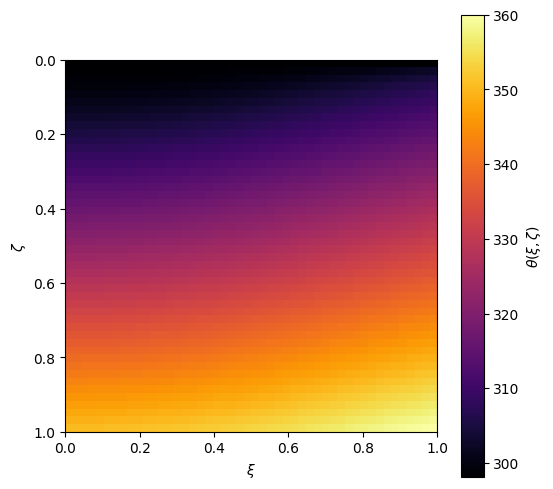

In [21]:
plt.figure(figsize=(6,6))
plt.imshow(np.transpose(T), origin="upper", extent =[0, 1, 1, 0], cmap = "inferno")
plt.colorbar(label=r"$\theta(\xi,\zeta)$")
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\zeta$')
plt.show()

Se puede observar un perfil bidimensional de temperatura, en donde la temperatura máxima se alcanza en la intersección del plano de salida de la tubería y la pared del tanque. 

Para comprender mejor la variación de los perfiles de temperatura, se graficará el perfil de temperatura en función del radio en distintas secciones transversales al flujo. Esto implica graficar un perfil radial para un valor de coordenada axial, $z$, dado.

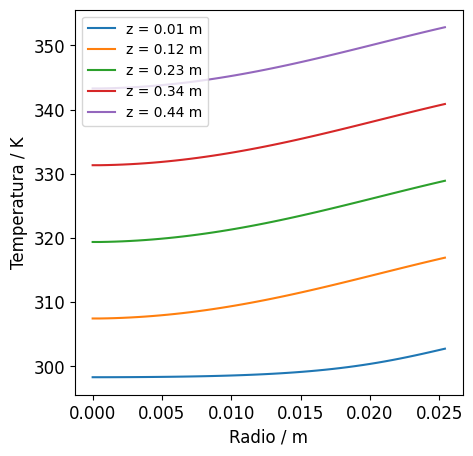

In [22]:
# Se crea una nueva figura
plt.figure(figsize=[5,5])

# Se grafica un perfil para espaciamientos igual a 10*dz

for i in range(1,len(z),10):
    plt.plot(r, T[:,i], label="z = %.2f m"%z[i])

# Títulos de ejes y estética
plt.xlabel('Radio / m', size = 12)
plt.ylabel('Temperatura / K', size = 12)
plt.tick_params(labelsize=12)

# Generación de leyendas
plt.legend()

plt.show()

Escogimos un número de Reynolds lo suficientemente bajo para que el perfil se desarrolle completamente. Observamos que a medida que la distancia desde el inicio aumenta, los perfiles de temperatura tienen la misma forma y se desplazan linealmente hacia arriba.

### Desafío:
Implemente la solución analítica al perfil de temperatura obtenida en la Clase 12 y compárela con la solución numérica derivada en este Notebook.